C:\Users\Harshada\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1466 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0478 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0341 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0218 - accuracy: 0.9930
313/313 - 3s - loss: 0.0422 - accuracy: 0.9860 - 3s/epoch - 9ms/step
Test accuracy: 0.9860000014305115
313/313 [==============================] - 4s 10ms/step


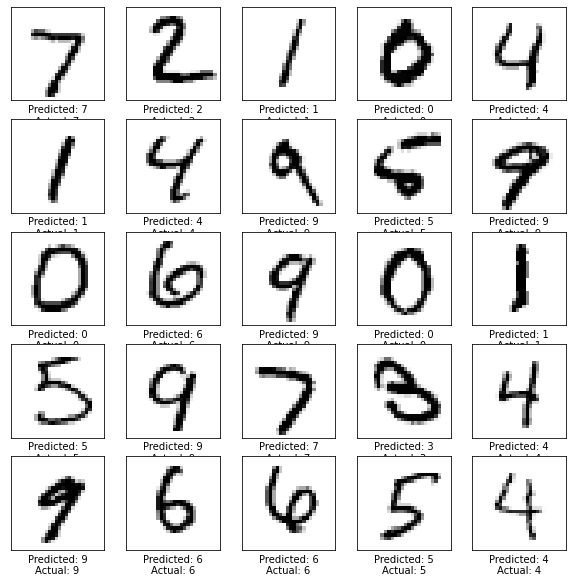

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {tf.argmax(predictions[i])}\nActual: {test_labels[i]}')
plt.show()